In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [24]:
df=pd.read_csv("diabetes_modified.csv")

#### Data dictionary for the Pima Indian Diabetes dataset:

| Features            | Description                                                                                            |
|----------------------------------------------|--------------------------------------------------------------------------------------------------------|
| Pregnancies                | Number of pregnancies                                                                                   |
| Glucose                    | Plasma glucose concentration a 2 hours in an oral glucose tolerance test                                |
| BloodPressure              | Diastolic blood pressure (mm Hg)                                                                       |
| SkinThickness              | Triceps skin fold thickness (mm)                                                                       |
| Insulin                    | 2-Hour serum insulin (mu U/ml)                                                                         |
| BMI                        | Body mass index (weight in kg/(height in m)^2)                                 |
|DiabetesPedigreeFunction   |  Measure used to assess the hereditary risk of diabetes based on family history. |
| Age                        | Age (years)                                                                                            |
| Outcome                    | Class indicating whether the individual has diabetes or not                  |



# overall picture


In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Diabetic
1,1.0,85.0,66.0,29.0,0.0,26.6,NaN,31.0,Non-Diabetic
2,8.0,183.0,64.0,0.0,0.0,23.3,NaN,32.0,Diabetic
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,Non-Diabetic
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Diabetic


In [26]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,Non-Diabetic
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,Non-Diabetic
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,Non-Diabetic
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,Diabetic
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,Non-Diabetic


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               762 non-null    float64
 1   Glucose                   751 non-null    float64
 2   BloodPressure             751 non-null    float64
 3   SkinThickness             753 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       739 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       766 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,762.000000,751.000000,751.000000,753.000000,765.000000,739.000000,739.000000,766.000000
mean,3.824147,120.719041,69.102530,20.540505,79.905882,32.032882,0.471766,33.227154
std,3.360596,31.958175,19.282846,15.912954,115.431340,7.901092,0.326533,11.755153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.350000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.300000,0.375000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,128.000000,36.600000,0.621500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [29]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [30]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
df.shape

(768, 9)

In [32]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object

In [33]:
df['Outcome'] = df['Outcome'].astype('category')
df.dtypes

Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                     category
dtype: object

In [34]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [35]:
df.sort_index(axis=1)

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness
0,50.0,33.6,72.0,0.627,148.0,0.0,Diabetic,6.0,35.0
1,31.0,26.6,66.0,NaN,85.0,0.0,Non-Diabetic,1.0,29.0
2,32.0,23.3,64.0,NaN,183.0,0.0,Diabetic,8.0,0.0
3,21.0,28.1,66.0,0.167,89.0,94.0,Non-Diabetic,1.0,23.0
4,33.0,43.1,40.0,2.288,137.0,168.0,Diabetic,0.0,35.0
...,...,...,...,...,...,...,...,...,...
763,63.0,32.9,76.0,0.171,101.0,180.0,Non-Diabetic,10.0,48.0
764,27.0,36.8,70.0,0.340,122.0,0.0,Non-Diabetic,2.0,27.0
765,30.0,26.2,72.0,0.245,121.0,112.0,Non-Diabetic,5.0,23.0
766,47.0,30.1,60.0,0.349,126.0,0.0,Diabetic,1.0,0.0


In [36]:
df.iloc[0:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Diabetic
1,1.0,85.0,66.0,29.0,0.0,26.6,NaN,31.0,Non-Diabetic


In [37]:
df.iloc[0:1,1:3]

,Glucose,BloodPressure
0,148.0,72.0


In [38]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [39]:
df.isnull().any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool

In [40]:
df.isnull().sum().sum()

118

In [41]:
df['Age'].unique()

array([50., 31., 32., 21., 33., 30., 26., 29., 53., 54., 34., 57., 59.,
       51., 27., 41., 43., 22., 38., 60., 28., 45., 35., 46., 56., 37.,
       48., 40., 25., 24., 58., 42., 44., 39., 36., 23., 61., 69., 62.,
       55., 65., 47., 52., 66., nan, 49., 63., 67., 72., 81., 64., 70.,
       68.])

# outlier

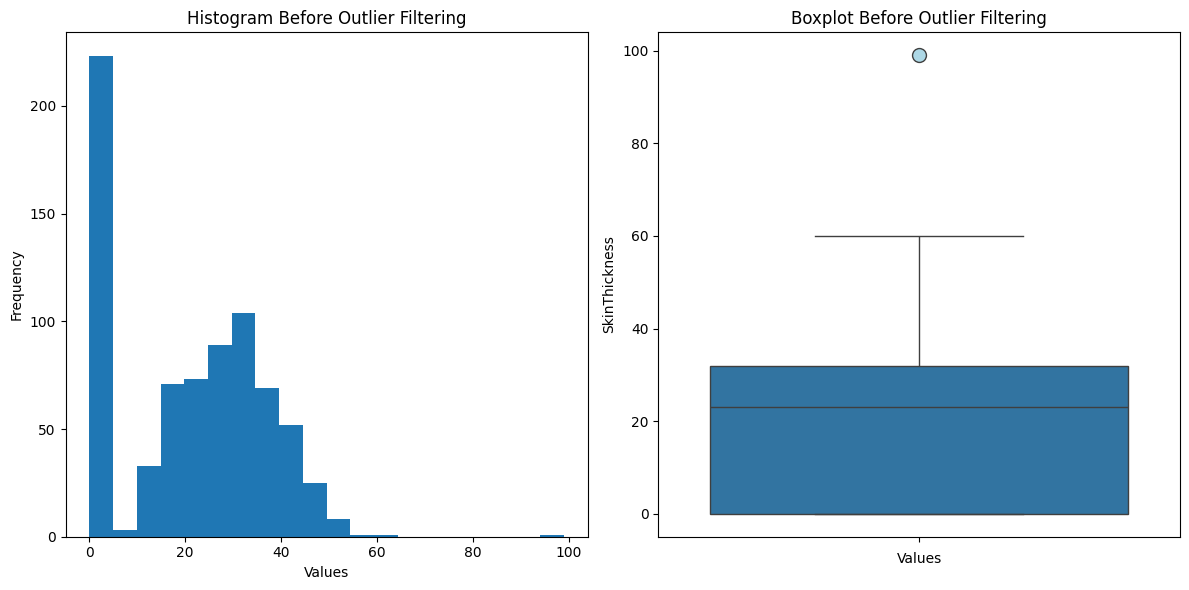

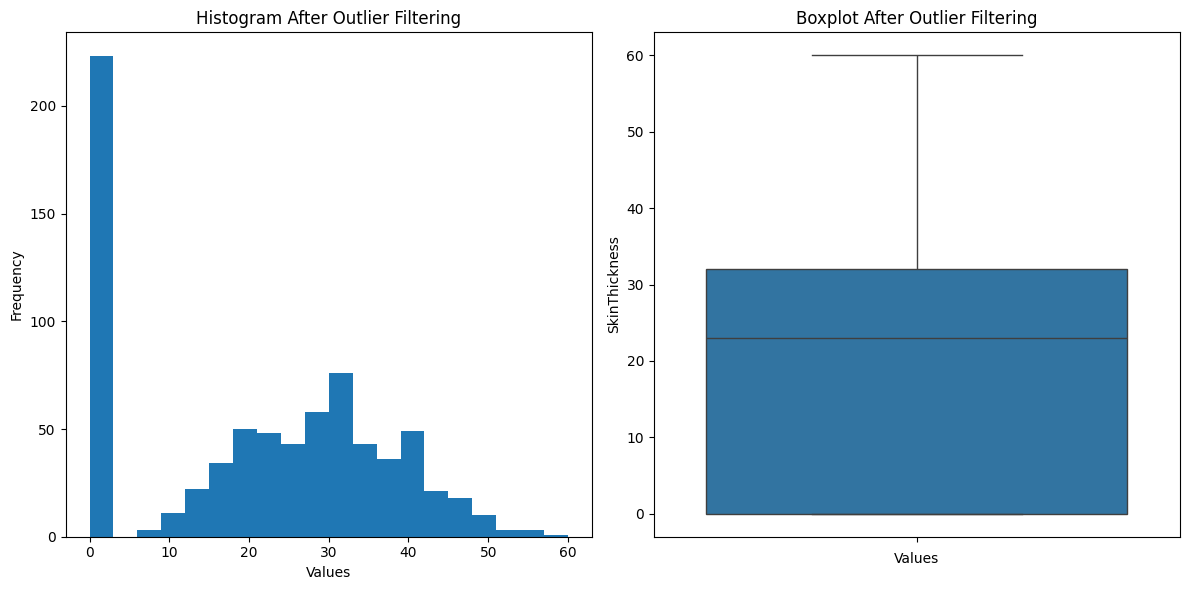

In [42]:
def plot_histogram_and_boxplot(data, column_name, title_suffix):
    plt.figure(figsize=(12, 6))    
    plt.subplot(1, 2, 1)
    plt.hist(data[column_name], bins=20)
    plt.title(f'Histogram {title_suffix}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column_name],
            flierprops=dict(marker='o', markerfacecolor='lightblue', markersize=10))
    plt.title(f'Boxplot {title_suffix}')
    plt.xlabel('Values')
    
    plt.tight_layout()
    plt.show()

def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]


# Plots before outlier removal
plot_histogram_and_boxplot(df, 'SkinThickness', 'Before Outlier Filtering')

# Remove outliers using IQR method
df_filtered = remove_outliers_iqr(df, 'SkinThickness')

# Plots after outlier removal
plot_histogram_and_boxplot(df_filtered, 'SkinThickness', 'After Outlier Filtering')


### label encoding

In [43]:
def label_encoding(df, column_name):
    label_encoder = LabelEncoder()
    df[column_name + '_LabelEncoded'] = label_encoder.fit_transform(df[column_name])
    print("DataFrame after label encoding:")
    print(df.iloc[:2,8:])

def one_hot_encoding(df, column_name):
    one_hot_encoder = OneHotEncoder()
    one_hot_encoded = one_hot_encoder.fit_transform(df[[column_name]]).toarray()
    enc_df = pd.DataFrame(one_hot_encoded, columns=[column_name + '_' + str(i) for i in range(one_hot_encoded.shape[1])])
    df = pd.concat([df, enc_df], axis=1)
    print("\nDataFrame after one-hot encoding:")
    print(df.iloc[:2,8:])


def dummy_encoding(df, column_name):
    dummy_encoded = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummy_encoded], axis=1)
    print("\nDataFrame after dummy encoding:")
    print(df.iloc[:2,8:])


# Apply label encoding
label_encoding(df, 'Outcome')

# Apply one-hot encoding
one_hot_encoding(df, 'Outcome')

# Apply dummy encoding
dummy_encoding(df, 'Outcome')

DataFrame after label encoding:
        Outcome  Outcome_LabelEncoded
0      Diabetic                     0
1  Non-Diabetic                     1

DataFrame after one-hot encoding:
        Outcome  Outcome_LabelEncoded  Outcome_0  Outcome_1
0      Diabetic                     0        1.0        0.0
1  Non-Diabetic                     1        0.0        1.0

DataFrame after dummy encoding:
        Outcome  Outcome_LabelEncoded  Outcome_Diabetic  Outcome_Non-Diabetic
0      Diabetic                     0              True                 False
1  Non-Diabetic                     1             False                  True


### groupBy()

In [44]:
summary_statistics = df.groupby('Outcome')['Age'].agg(['mean', 'median', 'min', 'max', 'std','count'])

summary_statistics


/tmp/ipykernel_30658/2793007161.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_statistics = df.groupby('Outcome')['Age'].agg(['mean', 'median', 'min', 'max', 'std','count'])


,mean,median,min,max,std,count
Outcome,,,,,,
Diabetic,37.056391,36.0,21.0,70.0,10.955167,266
Non-Diabetic,31.190000,27.0,21.0,81.0,11.667655,500
